# 1. Import cleaned data and necessary libraries
- Cleaned data generated by running `01_Data_Cleaning_Preprocessing` will be impoted into this notebook
- Required libraries are imported
- Inspect transferred data to see it is transferred corrctly

In [1]:
import pandas as pd
import numpy as np
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_parquet('data/interim/cleaned_data.parquet')
#print information of the cleaned data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2240 non-null   int64         
 1   Year_Birth               2240 non-null   int64         
 2   Income                   2240 non-null   float64       
 3   Kidhome                  2240 non-null   int64         
 4   Teenhome                 2240 non-null   int64         
 5   Dt_Customer              2240 non-null   datetime64[ns]
 6   Recency                  2240 non-null   int64         
 7   MntWines                 2240 non-null   int64         
 8   MntFruits                2240 non-null   int64         
 9   MntMeatProducts          2240 non-null   int64         
 10  MntFishProducts          2240 non-null   int64         
 11  MntSweetProducts         2240 non-null   int64         
 12  MntGoldProds             2240 non-

According to the result from above cell, the data has transferred correctly

# 2. Histograms & boxplots to detect outliers.
- Histogram and box plot of numerical varaibles (`Age(years)`, `Income`, `total_spending`, `total_purchases`) are ploted.

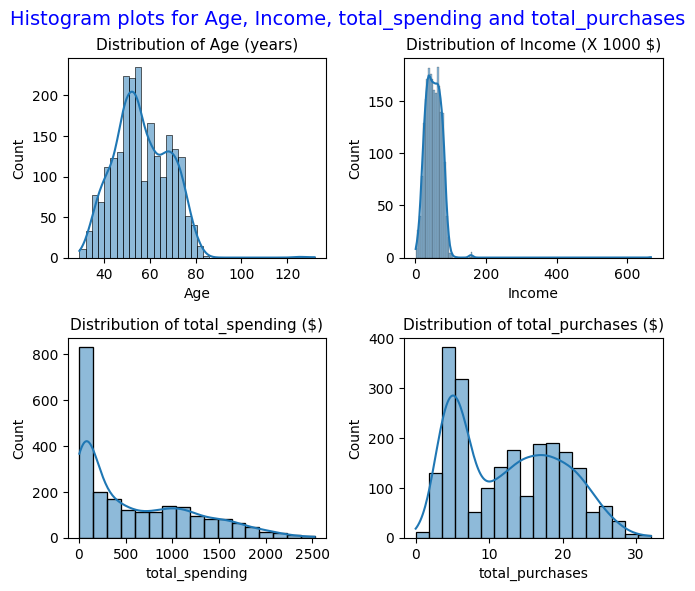

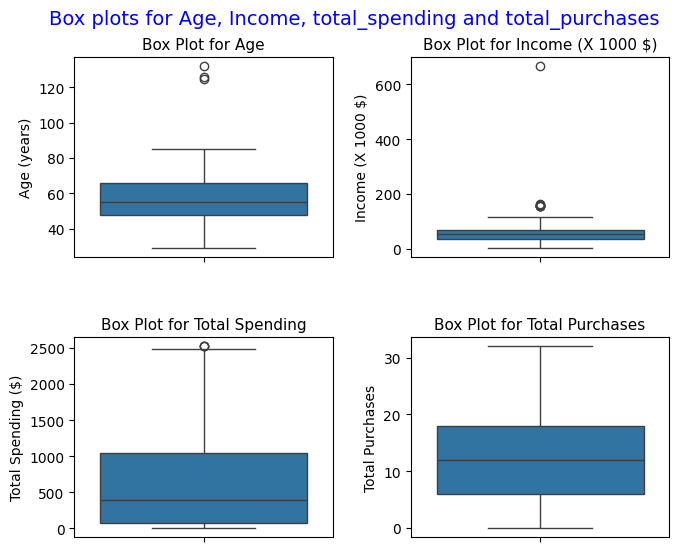

In [2]:
#plot histogram of variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 6))
fig.suptitle('Histogram plots for Age, Income, total_spending and total_purchases', fontsize=14, color = 'blue')
# Top-left: Histogram with KDE
sns.histplot(data=df, x='Age', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age (years)', fontsize = 11)
# Top-right: Histogram with KDE
sns.histplot(data=df, x=df['Income']/1000, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Income (X 1000 $)', fontsize = 11)
# Buttom-left: Histogram with KDE
sns.histplot(data=df, x='total_spending', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of total_spending ($)', fontsize = 11)
# Buttom-right: Histogram with KDE
sns.histplot(data=df, x='total_purchases', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of total_purchases ($)', fontsize = 11)
# Adjust spacing specifically between top and bottom rows
plt.subplots_adjust(hspace=0.4,  # Space between top and bottom rows
                    wspace=0.3,   # Space between columns
                    top=0.9,      # Space below suptitle
                    bottom=0.1,   # Space above x-axis labels
                    left=0.1,     # Space from left edge
                    right=0.95)   # Space from right edge
plt.show()

# box plot of variables 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 6))
fig.suptitle('Box plots for Age, Income, total_spending and total_purchases', fontsize=14, color = 'blue')
# Top-left: Box plot for Age
sns.boxplot(y=df['Age'], ax=axes[0, 0])
axes[0, 0].set_title('Box Plot for Age', fontsize = 11)
axes[0, 0].set_ylabel('Age (years)')
# Top-right: Box plot for Income  
sns.boxplot(y=df['Income']/1000, ax=axes[0, 1])
axes[0, 1].set_title('Box Plot for Income (X 1000 $)', fontsize = 11)
axes[0, 1].set_ylabel('Income (X 1000 $)')
# Bottom-left: Box plot for total_spending
sns.boxplot(y=df['total_spending'], ax=axes[1, 0])
axes[1, 0].set_title('Box Plot for Total Spending', fontsize = 11)
axes[1, 0].set_ylabel('Total Spending ($)')
axes[1, 0].set_xlabel('')  # Remove default x-label
# Bottom-right: Box plot for total_purchases
sns.boxplot(y=df['total_purchases'], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot for Total Purchases', fontsize = 11)
axes[1, 1].set_ylabel('Total Purchases')
axes[1, 1].set_xlabel('')  # Remove default x-label
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
# Adjust spacing specifically between top and bottom rows
plt.subplots_adjust(hspace=0.4,  # Space between top and bottom rows
                    wspace=0.3,   # Space between columns
                    top=0.9,      # Space below suptitle
                    bottom=0.1,   # Space above x-axis labels
                    left=0.1,     # Space from left edge
                    right=0.95)   # Space from right edge
plt.show()


According to above plots, there are some possible outliers in numerical variables (`Age(years)`, `Income`, `total_spending`). 

# 3. Interquartile Range (IQR) method is used to detect the possible outliers.
- Possible outliers are detected and recorded
- Possible outliers are analyzed

In [3]:
#Find possible outliers in Age variable
Q1=df['Age'].quantile(0.25) 
Q3=df['Age'].quantile(0.75) 
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_age =df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
#Find possible outliers in Income variable
Q1=df['Income'].quantile(0.25) 
Q3=df['Income'].quantile(0.75) 
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_Income =df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]
#Find possible outliers in total_spending variable
Q1=df['total_spending'].quantile(0.25) 
Q3=df['total_spending'].quantile(0.75) 
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_total_spending =df[(df['total_spending'] < lower_bound) | (df['total_spending'] > upper_bound)]
#Find possible outliers in total_purchases variable
Q1=df['total_purchases'].quantile(0.25) 
Q3=df['total_purchases'].quantile(0.75) 
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_total_purchases =df[(df['total_purchases'] < lower_bound) | (df['total_purchases'] > upper_bound)]
#Find possible outliers in the dataset by concating all above outliers
df_outliers = pd.concat([outliers_age, outliers_Income, outliers_total_spending, outliers_total_purchases], axis = 0)
print('Possible outliers listed below: ')
print("       ")
print(df_outliers)
print("       ")
print(f"Number of outliers: {df_outliers.shape[0]}")



Possible outliers listed below: 
       
         ID  Year_Birth    Income  Kidhome  Teenhome Dt_Customer  Recency  \
513   11004        1893   60182.0        0         1  2014-05-17       23   
827    1150        1899   83532.0        0         0  2013-09-26       36   
2233   7829        1900   36640.0        1         0  2013-09-26       99   
325    4931        1977  157146.0        0         0  2013-04-29       13   
497    1501        1982  160803.0        0         0  2012-08-04       21   
527    9432        1977  666666.0        1         0  2013-06-02       23   
731    1503        1976  162397.0        1         1  2013-06-03       31   
853    5336        1971  157733.0        1         0  2013-06-04       37   
1826   5555        1975  153924.0        0         0  2014-02-07       81   
1925  11181        1949  156924.0        0         0  2013-08-29       85   
2204   8475        1973  157243.0        0         1  2014-03-01       98   
671    5735        1991   90638.0  

Analysis of possible outliers (above results):
- Row # 513, #827 and #2233 will be removed since people with age 132 years, 126 years and 125 year is very rare!
- All information in row #671 and #672 are identical excpet counry, which it is impossible. it is most likely duplicated. Thus, row #672 is removed
- Row #527 has an income way to high for a person. This amount of income is impossible. Thus, it needs to be removed.


# 4. Drop outliers from the dataset
- Definite outliers are removed, rest are kept for further investigation

In [4]:
row_drop = [513, 827, 2233, 671, 527]
df_cleaned =df.drop(row_drop, axis = 0)
print(f"Number of row (data points) before oulier removal: {df.shape[0]} ")
print(f"Number of row (data points) after oulier removal:{df_cleaned.shape[0]} ")

Number of row (data points) before oulier removal: 2240 
Number of row (data points) after oulier removal:2235 


# 5. Correlation heatmap to analyze relationships

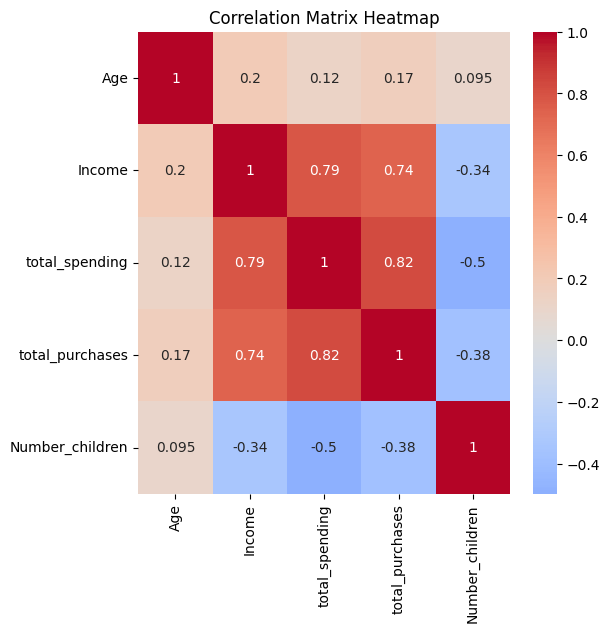

In [5]:
df_selected = df_cleaned[['Age', 'Income', 'total_spending', 'total_purchases', 'Number_children']]
#correlation_matrix = df_selected.corr()
corr_matrix = df_selected.corr()
#heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


According to above results: 
- Strongest relationship have seen between (`total_spending`) and (`total_purchases`)
- weakest relationship have seen between (`Age`) and (`Number_children`)

# 6. Check statistical distribution of the variable for being normal
- Since I have removed outliers, I need to plot histogram and also Q-Q graph for all variables at first
- Calcualte skewness & excess kurtosis
- Run Shapiro method for checking being normal check
- **Note:** upgrade statsmodels if needed by:     pip install --upgrade statsmodel

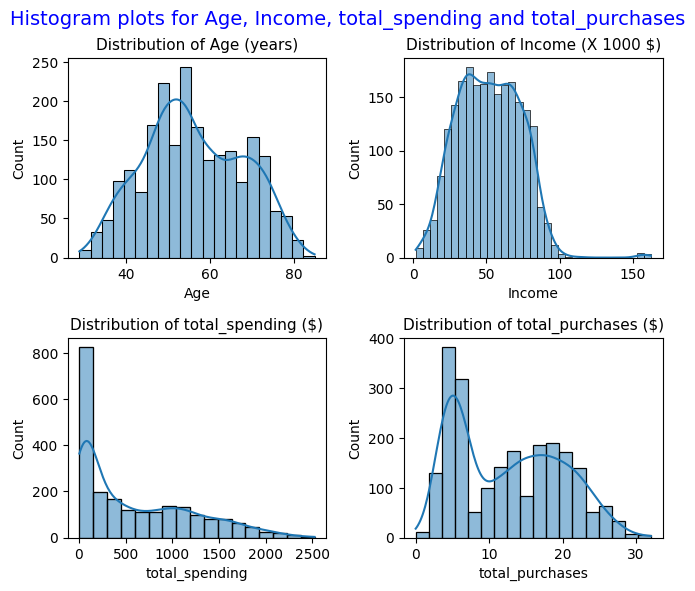

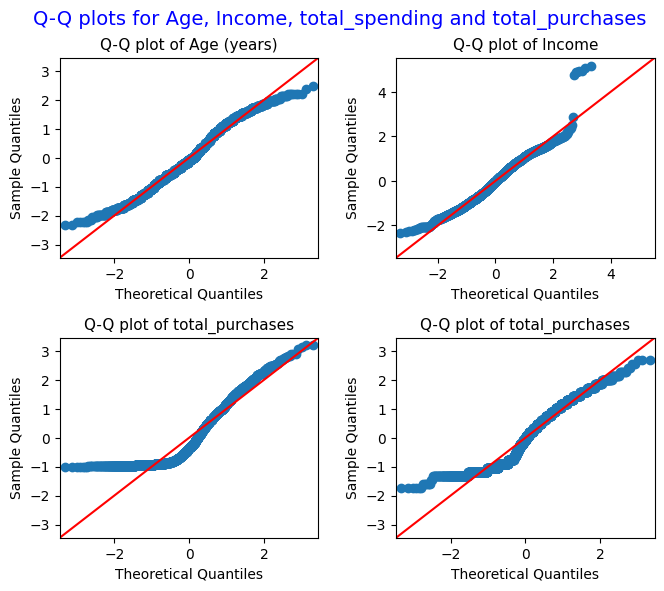

In [6]:
#plot histogram of variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 6))
fig.suptitle('Histogram plots for Age, Income, total_spending and total_purchases', fontsize=14, color = 'blue')
# Top-left: Histogram with KDE
sns.histplot(data=df_cleaned, x='Age', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age (years)', fontsize = 11)
# Top-right: Histogram with KDE
sns.histplot(data=df_cleaned, x=df_cleaned['Income']/1000, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Income (X 1000 $)', fontsize = 11)
# Buttom-left: Histogram with KDE
sns.histplot(data=df_cleaned, x='total_spending', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of total_spending ($)', fontsize = 11)
# Buttom-right: Histogram with KDE
sns.histplot(data=df_cleaned, x='total_purchases', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of total_purchases ($)', fontsize = 11)
# Adjust spacing specifically between top and bottom rows
plt.subplots_adjust(hspace=0.4,  # Space between top and bottom rows
                    wspace=0.3,   # Space between columns
                    top=0.9,      # Space below suptitle
                    bottom=0.1,   # Space above x-axis labels
                    left=0.1,     # Space from left edge
                    right=0.95)   # Space from right edge
plt.show()

# plot Q-Q graphs
import statsmodels.api as sm
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 6))
fig.suptitle('Q-Q plots for Age, Income, total_spending and total_purchases', fontsize=14, color = 'blue')
# Top-left: Q-Q plot for Age
sm.qqplot(df_cleaned['Age'].values, line='45', fit=True, ax=axes[0, 0])
axes[0, 0].set_title('Q-Q plot of Age (years)', fontsize = 11)
# Top-right: Q-Q plot for Income
sm.qqplot(df_cleaned['Income'].values, line='45', fit=True, ax=axes[0, 1])
axes[0, 1].set_title('Q-Q plot of Income', fontsize = 11)
# Buttom-left: Q-Q plot for Income
sm.qqplot(df_cleaned['total_spending'].values, line='45', fit=True, ax=axes[1, 0])
axes[1, 0].set_title('Q-Q plot of total_purchases', fontsize = 11)
# Buttom-right: Q-Q plot for Income
sm.qqplot(df_cleaned['total_purchases'].values, line='45', fit=True, ax=axes[1, 1])
axes[1, 1].set_title('Q-Q plot of total_purchases', fontsize = 11)
# Adjust spacing specifically between top and bottom rows
plt.subplots_adjust(hspace=0.4,  # Space between top and bottom rows
                    wspace=0.3,   # Space between columns
                    top=0.9,      # Space below suptitle
                    bottom=0.1,   # Space above x-axis labels
                    left=0.1,     # Space from left edge
                    right=0.95)   # Space from right edge

plt.show()


- **Calcualte skewness & excess kurtosis**
- **Shapiro-Wilk test check for normality**

In [7]:
from scipy.stats import skew, kurtosis
from scipy.stats import shapiro
# Calculate skew and excess kurtosis for variables 
sk_age = skew(df_cleaned['Age'].values, bias=False)
kt_excess_age = kurtosis(df_cleaned['Age'].values, fisher=True, bias=False)  # excess kurtosis
sk_Income = skew(df_cleaned['Income'].values, bias=False)
kt_excess_Income = kurtosis(df_cleaned['Income'].values, fisher=True, bias=False)  # excess kurtosis
sk_total_spending = skew(df_cleaned['total_spending'].values, bias=False)
kt_excess_total_spending = kurtosis(df_cleaned['total_spending'].values, fisher=True, bias=False)  # excess kurtosis
sk_total_purchases = skew(df_cleaned['total_purchases'].values, bias=False)
kt_excess_total_purchases = kurtosis(df_cleaned['total_purchases'].values, fisher=True, bias=False)  # excess kurtosis
# Run Shapiro–Wilk test for variables
stat, p_value_age = shapiro(df_cleaned['Age'].values)
stat, p_value_income = shapiro(df_cleaned['Income'].values)
stat, p_value_total_spending = shapiro(df_cleaned['total_spending'].values)
stat, p_value_total_purchases = shapiro(df_cleaned['total_purchases'].values)
print('Results of skewness and kurtosis analysis:')
print(f"Skewness of Age distribution {sk_age} and excess kurtosis {kt_excess_age}")
print(f"Skewness of income distribution {sk_Income} and excess kurtosis {kt_excess_Income}")
print(f"Skewness of total_spending distribution {sk_total_spending} and excess kurtosis {kt_excess_total_spending}")
print(f"Skewness of total_purchases {sk_total_purchases} and excess kurtosis {kt_excess_total_purchases}")
print("**************************************************************************")
print('Results of Shapiro–Wilk test:')
print(f"P-value for age distribution is {p_value_age}")
print(f"P-value for income distribution is {p_value_income}")
print(f"P-value for total_spending distribution is {p_value_total_spending}")
print(f"P-value for total_purchases distribution is {p_value_total_purchases}")


Results of skewness and kurtosis analysis:
Skewness of Age distribution 0.09318005141809128 and excess kurtosis -0.7960573867959697
Skewness of income distribution 0.34962227620452396 and excess kurtosis 0.7603032490741608
Skewness of total_spending distribution 0.8555656955614988 and excess kurtosis -0.35936897061620776
Skewness of total_purchases 0.29608524206744147 and excess kurtosis -1.1190277763730458
**************************************************************************
Results of Shapiro–Wilk test:
P-value for age distribution is 1.6729978229338104e-15
P-value for income distribution is 5.884611736613058e-19
P-value for total_spending distribution is 3.3094740822001374e-40
P-value for total_purchases distribution is 3.3573367503886564e-30


- Since all P-value calculated from Shapiro–Wilk test for the variables are less than critical P-value (0.05) >>> All can be considered normal
- From skewness and kurtosis analysis of the variables, except total_purchases, all variables are approximately normal distribution

# 7. Save cleaned data into a file.
Next juypter notebook will use this data and do second part of the project. 

In [8]:
df_cleaned.to_parquet('data/interim/data_outliers_cleared.parquet')